# Laboratorio 2

## Algoritmi di ordinamento ed equazioni ricorsive

Abbiamo un algoritmo di questo tipo:
```
def function(n) -> int:
    if (n <= 1)
        return n;
    else
        a <- 1;
        for k <- 1 to n do
            a <- a * 2;
        endfor
        return a + 2 * function(n/2);
    endif
```

1. Determinare in modo esplicito il costo computazionale della precedente funzione ricorsiva.
     $$T(n) = \begin{cases} 
        c_1 & \text{if } n \leq 1 \\
        T(\frac{n}{2}) + c_2n  & \text{otherwise}
        \end{cases} $$
        
2. Risolvere l'equazione ricorsiva trovata con il metodo della sostituzione.

    - Assumiamo che $T(n) \in O(n) $:

        Caso base: $n= 1 \rightarrow T(1) = c_1 \cdot 1 \leq c $, per $c \geq c_1$
        
        Dimostriamo che $T(n) \leq cn $ per $n \geq 2$.
        
        $T(n) = T(n/2) + c_2 \cdot n \leq c (n/2) + c_2 \cdot n$

        Dobbiamo mostrare $c (n/2) + c_2\cdot n \leq c n$ per $n \geq 2$. 

        $(\frac{c}{2} + c_2)n \leq cn$ per $n \geq 2$
        
        $c_2 \leq \frac{c}{2}$ 

        Scelgo $c \geq 2c_2$.
            
3. Risolvere l'equazione ricorsiva trovata con l' albero di ricorsione.
    - una sola chiamata ricorsiva
    - albero: n -- n/2 -- n/4 -- n/8 -- ... -- 1
    - il costo della chiamata per ogni livello è $n/2^i$
    - vengono fatti $log_2(n)$ chiamate
    - costo complessivo: $\sum_{i=0}^{log_2 \  n} \frac{c_2\ n}{2^i} = c_2 \ n \sum_{i=0}^{log_2\ {n}} \frac{1}{2^i} = c_2 \ n ( 2 - 2^{-log_2\ n}) = c_2\ n (2 - \frac{1}{n}) $

    - costo final $O(n)$

4. Risolvere l'equazione ricorsiva trovata con il teorema dell'esperto.
    - $a = 1, b = 2, f(n) = \Theta(n) = \Omega(n^{log_2\ 1 + \epsilon})$ per $\epsilon = 1$
    - Soluzione: $T(n) = \Theta(n)$ per il terzo caso del teorema dell'esperto




5. (*Opzionale*) implementare la funzione in Python e verificare il costo computazionale stimato osservando i tempi di esecuzione per input di dimensione crescente.

In [1]:
def fun(n):
    if n == 0:
        return n
    else:
        a = 1
        for k in range(n):
            a = a * 2
        return a + 2*fun(int(n/2))

Text(0.5, 1.0, 'Time complexity')

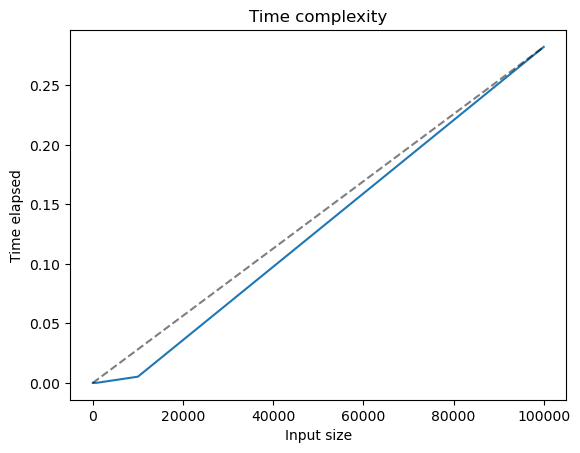

In [86]:
import numpy as np
import time
import matplotlib.pyplot as plt

dim_input = [10**i for i in range(0, 6)]
timing = []
ntrials = 100

for i in range(len(dim_input)):
    since = time.time()
    for j in range(ntrials):
        fun(dim_input[i])
    elapsed = time.time() - since
    timing.append(elapsed/ntrials)

plt.plot(dim_input, timing)
# plot linear relationship between input size and time
plt.plot(dim_input, [(timing[-1]/dim_input[-1]) * dim_input[i]  for i in range(len(dim_input))], 'k--', alpha=0.5)
plt.xlabel('Input size')
plt.ylabel('Time elapsed')
plt.title('Time complexity')